In [1]:
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
DF=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")


In [3]:
DF.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
DF.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
DF.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
DF.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
DF.shape

(200, 5)

In [8]:
DF.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No missing data in the data set

# Distribution of Data

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

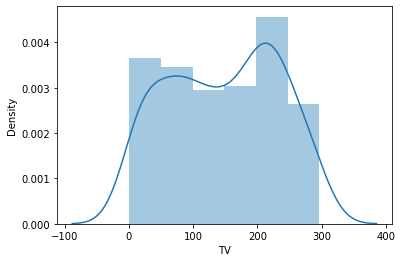

In [12]:
sns.distplot(DF["TV"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

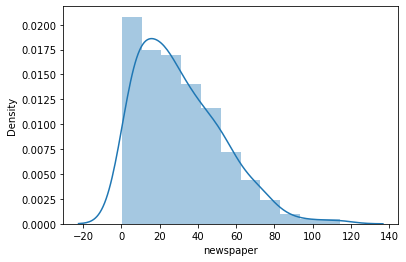

In [13]:
sns.distplot(DF["newspaper"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

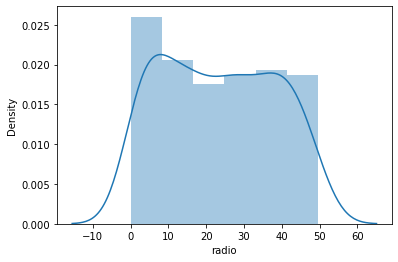

In [14]:
sns.distplot(DF["radio"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

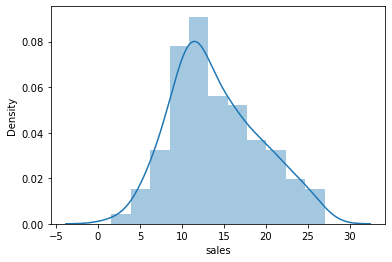

In [15]:
sns.distplot(DF["sales"])

# Outliers Checking

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


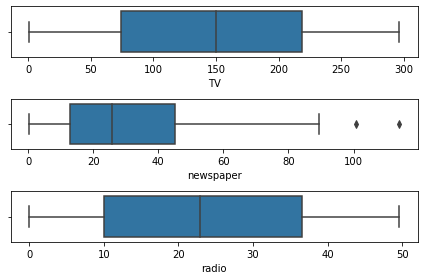

In [10]:
fig, axs = plt.subplots(3, figsize = (6,4))
plt1 = sns.boxplot(DF['TV'], ax = axs[0])
plt2 = sns.boxplot(DF['newspaper'], ax = axs[1])
plt3 = sns.boxplot(DF['radio'], ax = axs[2])
plt.tight_layout()

Only Newspaper column has outliers which has to be removed

In [16]:
DF.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Newspaper data is slightly skewed

<AxesSubplot:>

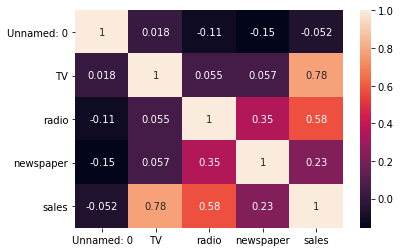

In [17]:
sns.heatmap(DF.corr(),annot=True)

# Treating outliers

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(DF))
z.shape

(200, 5)

In [19]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4
0,1.723412,0.969852,0.981522,1.778945,1.552053
1,1.706091,1.197376,1.082808,0.669579,0.696046
2,1.688771,1.516155,1.528463,1.783549,0.907406
3,1.671450,0.052050,1.217855,1.286405,0.860330
4,1.654129,0.394182,0.841614,1.281802,0.215683
5,1.636808,1.615408,1.731034,2.045930,1.310911
6,1.619488,1.045577,0.643905,0.324708,0.427043
7,1.602167,0.313437,0.247406,0.872487,0.158039
8,1.584846,1.616576,1.429069,1.360424,1.772059
9,1.567526,0.616043,1.395307,0.430582,0.657617


In [22]:
DF1=DF[(z<3).all(axis=1)]
DF1

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [24]:
Data_Loss=((200-198)/200)*100
Data_Loss

1.0

In [25]:
DF1.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

# Splitting Data set into Dependent and independent

In [28]:
x=DF.iloc[:,:-1]
y=DF.iloc[:,-1]


,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


# Removing Skewness

In [29]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [30]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9132696317827832
At random state 0,the testing accuracy is:- 0.8811798295875324


At random state 1,the training accuracy is:- 0.9072105743626194
At random state 1,the testing accuracy is:- 0.8960231291085182


At random state 2,the training accuracy is:- 0.9183791537646105
At random state 2,the testing accuracy is:- 0.8125409856286657


At random state 3,the training accuracy is:- 0.9045196673318758
At random state 3,the testing accuracy is:- 0.9173593907346816


At random state 4,the training accuracy is:- 0.9058689018042966
At random state 4,the testing accuracy is:- 0.899597350324671


At random state 5,the training accuracy is:- 0.9058210406242954
At random state 5,the testing accuracy is:- 0.9109591696327539


At random state 6,the training accuracy is:- 0.9032285318233373
At random state 6,the testing accuracy is:- 0.9256522582734472


At random state 7,the training accuracy is:- 0.9024397997123862
At random state 7,the testing accu

At random state 71,the training accuracy is:- 0.9189792060396488
At random state 71,the testing accuracy is:- 0.8598689497110676


At random state 72,the training accuracy is:- 0.9020799850151131
At random state 72,the testing accuracy is:- 0.924322917596631


At random state 73,the training accuracy is:- 0.9139519011207577
At random state 73,the testing accuracy is:- 0.8710500126448035


At random state 74,the training accuracy is:- 0.9062419031879947
At random state 74,the testing accuracy is:- 0.8970659393286855


At random state 75,the training accuracy is:- 0.9043301318643515
At random state 75,the testing accuracy is:- 0.9186982729174766


At random state 76,the training accuracy is:- 0.9167938672322122
At random state 76,the testing accuracy is:- 0.785274673996695


At random state 77,the training accuracy is:- 0.9009126848212656
At random state 77,the testing accuracy is:- 0.9291153778871191


At random state 78,the training accuracy is:- 0.9053316667363762
At random state 78,t

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)

In [33]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.9075874799574031


In [35]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.8870253267919482 and accuracy score for training is -0.937120016085079 and accuracy for the testing is 0.9075874799574031


At cross fold 3 the cv score is 0.8997214482695925 and accuracy score for training is -0.937120016085079 and accuracy for the testing is 0.9075874799574031


At cross fold 4 the cv score is 0.8956922491130903 and accuracy score for training is -0.937120016085079 and accuracy for the testing is 0.9075874799574031


At cross fold 5 the cv score is 0.8953473674194841 and accuracy score for training is -0.937120016085079 and accuracy for the testing is 0.9075874799574031


At cross fold 6 the cv score is 0.8989475213938137 and accuracy score for training is -0.937120016085079 and accuracy for the testing is 0.9075874799574031


At cross fold 7 the cv score is 0.8941723706624096 and accuracy score for training is -0.937120016085079 and accuracy for the testing is 0.9075874799574031


At cross fold 8 the cv score is 0.891699359391172 an

we will take CV=3 as thats the highest score

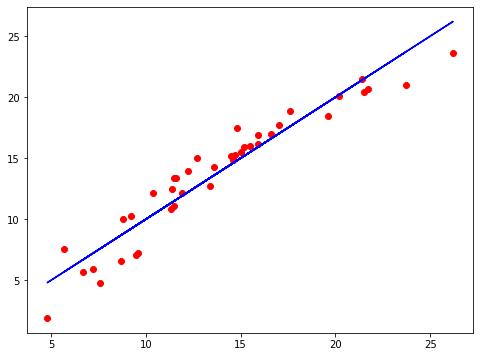

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[86],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 0.1, 'precompute': False, 'random_state': 86, 'selection': 'cyclic'}


In [43]:
Las = Lasso(alpha=0.1,random_state=86,precompute=False,selection="cyclic")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.9105592638574331

In [44]:
cvscore=cross_val_score(Las,x,y,cv=3)
cvmean=cvscore.mean()
cvmean

0.9004583781420856

# Ensemble Technique - Random Forest

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[86],'bootstrap':[True,False]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_features': 'auto', 'random_state': 86}


In [47]:
rf= RandomForestRegressor(criterion="mae",max_features="auto",random_state=86,bootstrap=True)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=3)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.47669361498335
Cross Val Score: 97.06531957344522


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[86]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 86, 'splitter': 'best'}


In [49]:
DTR = DecisionTreeRegressor(criterion='mae', splitter='best',random_state=86,max_features='auto')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 95.50521971634211
Cross Val Score: 90.30654190225968


From the above results we conclude that Random Forest is the best fit

In [52]:
import pickle
filename = 'asc.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [54]:
import numpy as np
a=np.array(y_test)
a

array([20.2, 14.5,  8.7, 21.4, 15.9, 23.7, 10.4, 11.6,  5.7,  9.2,  7.6,
       11.5,  9.5, 17. , 17.6,  6.7,  9.6, 13.4, 14.7, 13.6, 15. , 15.5,
        4.8, 15.9, 11.9, 14.6,  8.8, 16.6, 14.8, 21.5, 21.7, 12.2, 15.2,
       19.6, 26.2, 11.5,  7.2, 11.3, 11.4, 12.7])

In [55]:
predicted=np.array(rf.predict(x_test))
predicted

array([19.968, 14.785,  8.995, 20.396, 16.343, 22.799, 11.172, 12.023,
        5.41 ,  8.485,  8.691, 12.023,  9.422, 17.255, 16.739,  6.694,
        9.488, 12.576, 13.625, 13.006, 16.161, 15.505,  5.106, 15.755,
       12.64 , 14.976,  8.358, 16.074, 13.931, 21.948, 22.21 , 12.107,
       14.899, 18.641, 25.191, 11.851,  7.282, 11.235, 11.701, 11.752])

In [56]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [57]:
conclusion

,original,predicted
0,20.2,19.968
1,14.5,14.785
2,8.7,8.995
3,21.4,20.396
4,15.9,16.343
5,23.7,22.799
6,10.4,11.172
7,11.6,12.023
8,5.7,5.410
9,9.2,8.485
